## **Detecting Parkinsons Disease with Machine Learing**

![alt text](https://www.elderresearch.com/hs-fs/hubfs/BLOG_Parkinson%E2%80%99s%20Test%20Recommendation%20Engine.jpg?width=850&name=BLOG_Parkinson%E2%80%99s%20Test%20Recommendation%20Engine.jpg)

# Inside the Notebook:
#####        1. Import  libraries
#####        2. Loading helper functions
#####         3. Reading data and quick overiew
#####         4. Target variables distribution
#####         5. Independent variables distribution
#####         6. Data preparation
#####         7. Training Models
#####         8. Creating Meta Classifier
#####         9. Enemble models
#####         10. Final results

## 1. Importing libraries

In [167]:
import pandas as pd                                                         ## for dataframe handling
import numpy as np                                                          ## array handling
from numpy import set_printoptions
import matplotlib.pyplot as plt                                             ## plotting
%matplotlib inline
import seaborn as sns                                                       ## plotting
from statsmodels.stats.outliers_influence import variance_inflation_factor  ## VIF calculation
from statsmodels.regression.linear_model import OLS as ols                  ## VIF calculation
from sklearn.metrics import accuracy_score                                  ## model evaluation parameters
from sklearn.metrics import precision_score, recall_score, confusion_matrix ## model evaluation parameters
from sklearn.metrics import f1_score, roc_auc_score, roc_curve,make_scorer  ## model evaluation parameters
from sklearn.model_selection import train_test_split,cross_val_score        ## Train Test split
from sklearn.svm import SVC                                                 ## SVM
from sklearn.linear_model import LogisticRegression                         ## Logistic Regression
from sklearn.neighbors import KNeighborsClassifier                          ## K Nearest Neighbour
from sklearn.model_selection import GridSearchCV                            ## Grid Search for hyperparameter tunning
from sklearn.tree import DecisionTreeClassifier as dt                       ## Decision Tree
from sklearn.ensemble import RandomForestClassifier                         ## Random Forest
from sklearn.ensemble import StackingClassifier                             ## For creating meta classifier
from sklearn.ensemble import GradientBoostingClassifier                     ## Gradient Boosting

## 2. Loading helper functions

In [94]:
def generate_model_report(y_actual, y_predicted):
    """
    Calculate model evaluation parameters with input as actual Y column and predicted Y column
    """
    from sklearn.metrics import accuracy_score ## accuracy calculations
    from sklearn.metrics import precision_score, recall_score, confusion_matrix ## model evaluation parameters
    from sklearn.metrics import f1_score, roc_auc_score, roc_curve ##some more model evaluation parameters
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass 

In [95]:
def run_my_model_log(data,X,y):
    """
    This function will run logistic regression model with the input as dataframe, X and Y. 
    It will sPDit the data into train and test with test size=0.3
    It will give the proportion of 1 and 0 in the dataframe, trainset and testset
    It will also calculate the model evaluation parameters and Confusion matrix
    """
    print('\033[1m Following results are for Logistic Regression \033[0;0m')

    print("\n")
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    # Fit the model on train
    model = LogisticRegression(solver="liblinear")
    model.fit(x_train, y_train)
    #predict on test
    y_predict = model.predict(x_test)

    model_score = model.score(x_test, y_test)
    model_score_train=metrics.accuracy_score(y_train,model.predict(x_train))
    model_recall_score=metrics.recall_score(y_test, y_predict, average='binary')
    model_precision_score=metrics.precision_score(y_test, y_predict, average='binary')
    model_f1_score=metrics.f1_score(y_test, y_predict, average='binary')
    

    print("Original PD True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 1]), (len(data.loc[data['status'] == 1])/len(data.index)) * 100))
    print("Original PD False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 0]), (len(data.loc[data['status'] == 0])/len(data.index)) * 100))
    print("")
    print("Training PD True Values    : {0} ({1:0.2f}%)".format(y_train.value_counts()[1], (y_train.value_counts()[1]/len(y_train)) * 100))
    print("Training PD False Values   : {0} ({1:0.2f}%)".format(y_train.value_counts()[0], (y_train.value_counts()[0]/len(y_train)) * 100))
    print("")
    print("Test PD True Values        : {0} ({1:0.2f}%)".format(y_test.value_counts()[1], (y_test.value_counts()[1]/len(y_test)) * 100))
    print("Test PD False Values       : {0} ({1:0.2f}%)".format(y_test.value_counts()[0], (y_test.value_counts()[0]/len(y_test)) * 100))
    print("")
    
    print('The Model Score is {}'.format(round(model_score*100,2)))
    print('The Model Score on train set is {}'.format(round(model_score_train*100,2)))
    print('The Recall Score for the Model is {}'.format(round(model_recall_score*100,2)))
    print('The Precision Score for the Model is {}'.format(round(model_precision_score*100,2)))
    print('The F1 Score for the Model is {}'.format(round(model_f1_score*100,2)))
    
    
    print('\n')

    
    cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    return sns.heatmap(df_cm, annot=True,fmt='g')

In [96]:
def run_my_model_knn(X,y,k):
    """
    This function will run KNN algorithm on the data.
    """
    print('\033[1m Following results are for KNN  \033[0;0m')
    print("\n")
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from scipy.stats import zscore
    from sklearn import metrics
    # convert the features into z scores 
    XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
    #XScaled.describe()
    X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)
    kkn_model = KNeighborsClassifier(n_neighbors=  k, weights = 'distance' )
    kkn_model.fit(X_train,y_train.values.ravel())
    model_score_train=metrics.accuracy_score(y_train,kkn_model.predict(X_train))
    print('The Model Accuracy Score on train set is {}'.format(round(model_score_train,2)))
    print("\n")
    y_predict=kkn_model.predict(X_test)
    generate_model_report(y_test,y_predict)
    print("\n")
    conf_mat=pd.crosstab(y_predict, y_test, rownames=['Predicted'], colnames=['Actual'])
    print('Confusion Matrix')
    print("\n")
    print(conf_mat)


In [97]:
def run_my_model_nb(X,y):
    print('\033[1m Following results are for Navie Bayes Classifier \033[0;0m')
    print("\n")
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train.values.ravel())
    model_score_train=metrics.accuracy_score(y_train,nb_model.predict(X_train))
    print('The Model Accuracy Score on train set is {}'.format(round(model_score_train,2)))
    print("\n")

    y_predict=nb_model.predict(X_test)
    generate_model_report(y_test,y_predict)
    print("\n")
    conf_mat=pd.crosstab(y_predict, y_test, rownames=['Predicted'], colnames=['Actual'])
    print('Confusion Matrix')
    print("\n")
    print(conf_mat)


In [98]:
def run_my_model_svm(X,y,g,c):
    print('\033[1m Following results are for SVM Classifier \033[0;0m')
    print("\n")
    from sklearn import svm
    from sklearn import metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    svm_model = svm.SVC(gamma=g, C=c)   
    svm_model.fit(X_train, y_train.values.ravel())
    model_score_train=metrics.accuracy_score(y_train,svm_model.predict(X_train))
    print('The Model Accuracy Score on train set is {}'.format(round(model_score_train,2)))
    print("\n")

    y_predict=svm_model.predict(X_test)
    generate_model_report(y_test,y_predict)
    print("\n")
    conf_mat=pd.crosstab(y_predict, y_test, rownames=['Predicted'], colnames=['Actual'])
    print('Confusion Matrix')
    print("\n")
    print(conf_mat)


In [99]:
def quick_report(df):

  """ 
  This function will give a quick overview about dataset shape, dtypes, column names and NULL value count
  
  """
  print('Data Types:')
  print(df.dtypes)
  print("----------------------------------------------------------------------")  
  print('Rows and Columns:')
  print(df.shape)
  print("----------------------------------------------------------------------")  
  print('Column Names:')
  print(df.columns)
  print("----------------------------------------------------------------------")  
  print('Number of Null Values:',df.isnull().sum().sum())
  #print(df.isnull().sum().sum())

In [100]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    finaldf=df.sort_values(by='corr',ascending=False)
    return finaldf

In [101]:
def transform_minmaxscaler(x):
  """
  This function will apply minmax transformation on the column input and will return the transformed version of the input parameter 
  """
  to_scaled=pd.DataFrame(x)
  from sklearn.preprocessing import MinMaxScaler 
  scaler=MinMaxScaler(copy=False)
  to_scaled_minmax = scaler.fit_transform(to_scaled)
  to_scaled_minmax=pd.DataFrame(to_scaled_minmax,columns=[to_scaled.columns])
  return to_scaled_minmax

In [102]:
def vif_cal(input_data):
    #x_vars=input_data.drop([dependent_col], axis=1)
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(endog=y, exog=x, data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
        

## 3. Reading data and quick overview 

In [89]:
##importing dataset
data=pd.read_csv('Parkinsons.csv')

### **Attribute Information:**

1. MDVPF0:(Hz):	Average vocal fundamental frequency
2. MDVP:Fhi:(Hz):	Maximum vocal fundamental frequency
3. MDVP:Flo:(Hz):	Minimum vocal fundamental frequency
4. MDVPJitter(%):	MDVP jitter in percentage
5. MDVPJitter(Abs):MDVP absolute jitter in ms
6. MDVPRAP:		MDVP relative amplitude perturbation
7. MDVPPPQ:		MDVP five-point period perturbation quotient
8. Jitter:DDP:		Average absolute difference of differences between jitter cycles
9. MDVP:Shimmer:	MDVP local shimmer
10. MDVPShimmer(dB):MDVP local shimmer in dB
11. Shimmer:APQ3:	Three-point amplitude perturbation quotient
12. Shimmer:APQ5:	Five-point amplitude perturbation quotient
13. MDVP:APQ:		MDVP 11-point amplitude perturbation quotient
14. Shimmer:DDA:	Average absolute differences between the amplitudes of consecutive periods
15. NHR:			Noise-to-harmonics ratio
16. HNR:			Harmonics-to-noise ratio
17. RPDE:			Recurrence period density entropy measure
18. D2:				Correlation dimension
19. DFA:			Signal fractal scaling exponent of detrended fluctuation analysis
20. Spread1:		Two nonlinear measures of fundamental
21. Spread2:		Frequency variation
22. PPE:			Pitch period entropy

Reference link for more explanantion on the attributes-http://audiologistjobandnotes.blogspot.com/2012/01/mdvp-parameters-explaining-by.html



In [6]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
quick_report(data)

Data Types:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object
----------------------------------------------------------------------
Rows and Columns:
(195, 24)
----------------------------------------------------------------------
Column Names:
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP',

In [104]:
new_col_names={ 'MDVP:Fo(Hz)':'Avg_vocal_freq', 'MDVP:Fhi(Hz)':'Highest_vocal_freq', 'MDVP:Flo(Hz)':'Lowest_vocal_freq', 'MDVP:Jitter(%)':'Jitter%',
'MDVP:Jitter(Abs)':'Jitter_abs', 'MDVP:RAP':'RAP', 'MDVP:PPQ':'PPQ', 'Jitter:DDP':'DDP','MDVP:Shimmer':'Shimmer', 'MDVP:Shimmer(dB)':'Shimmer_dB', 'Shimmer:APQ3':'APQ3',
 'Shimmer:APQ5':'APQ5','MDVP:APQ':'APQ', 'Shimmer:DDA':'DDA'}

In [105]:
data=data.rename(new_col_names,axis=1)

In [106]:
data.drop('name',axis=1,inplace=True)

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_vocal_freq,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Highest_vocal_freq,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Lowest_vocal_freq,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
Jitter%,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
Jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmer_dB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### **Overview of the dataframe**

1.   We have data for 195 individuals across 24 attributes
2.   75% of the individuals are diagnosed by Parkinson
3.   By the nature of the data or the underline problem statement, we expect zero null values and same is the case with the underline data. We have zero null values
4.   Few attributes seems to be drived from others, which indicates that we might need to check the multicollinearity within the predictors.
5.   All attributes are observed to be numeric in nature and are on different scale. We should consider scalling the data before building model on it

## 4. Target variable distribution

In [8]:
data['status'].value_counts(normalize=True)*100

1    75.384615
0    24.615385
Name: status, dtype: float64

#### 75% of the individuals are diagnosed with Parkinsons disease. Only 25% of the individuals in the dataframe are negative which indicates that we have minor class imbalance problem. We might face an issue where the model is predicting all cases as Positive which in return will give us high Recall score but the number of False Positive cases will be more.

## 5. Independent variables distribution

#### 5.1 Distributions for all variables (Histogram)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002560507EA58>,
      dtype=object)

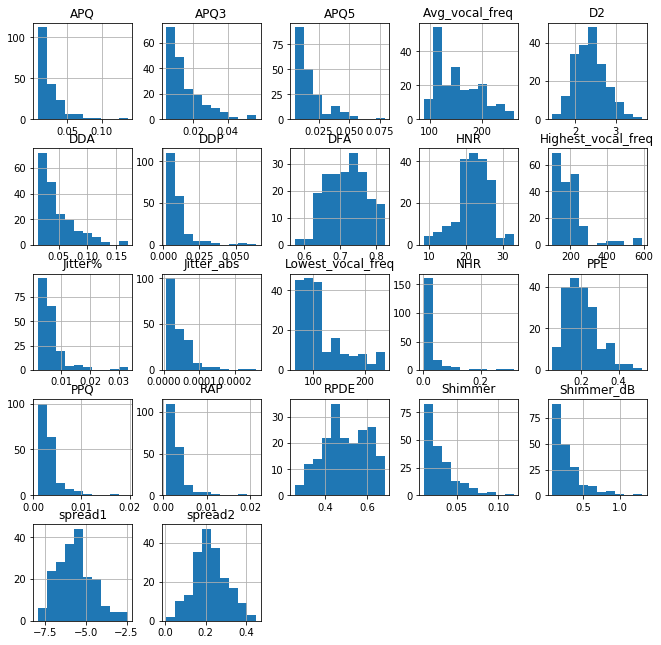

In [81]:
## Histogram for all predictors
cols=list(data.columns)
df = data[cols]
df[df.dtypes[(df.dtypes=="float64")].index.values].hist(figsize=[11,11])

#### 5.2 Outlier detection (Boxplot's)

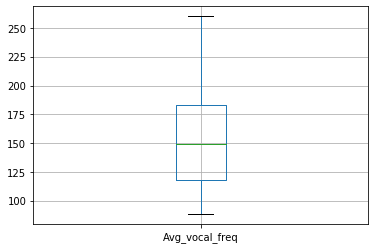

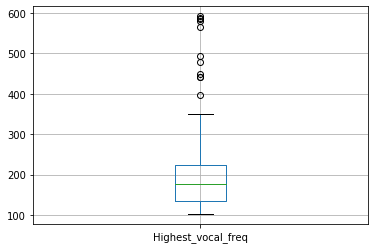

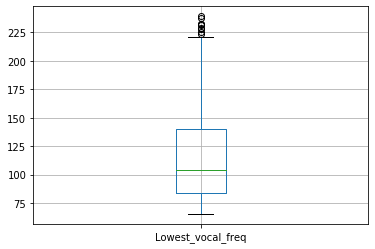

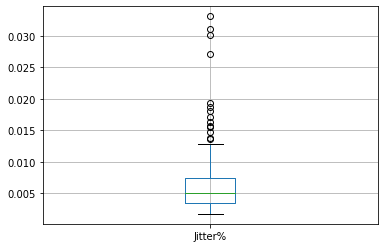

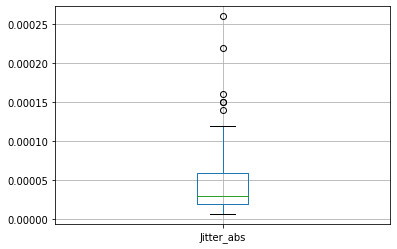

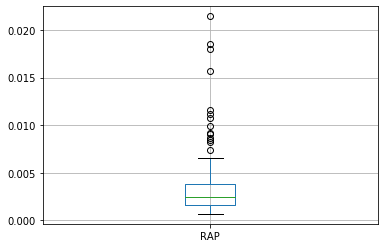

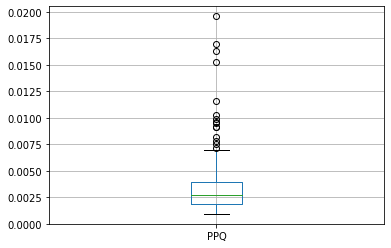

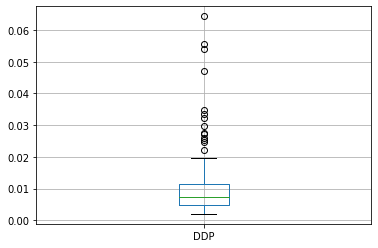

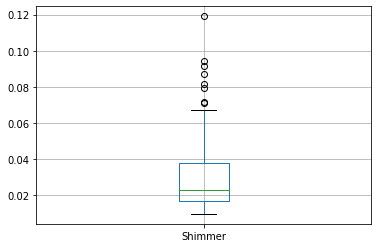

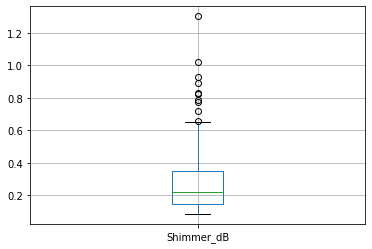

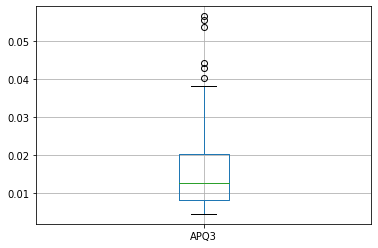

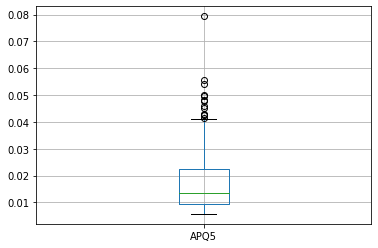

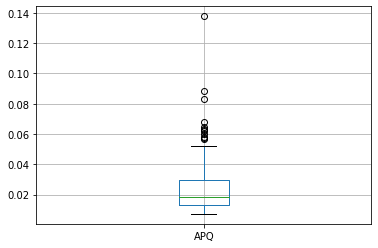

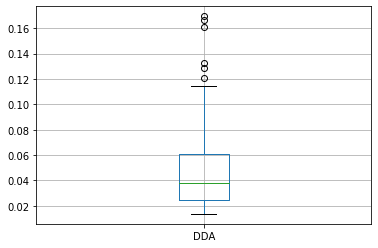

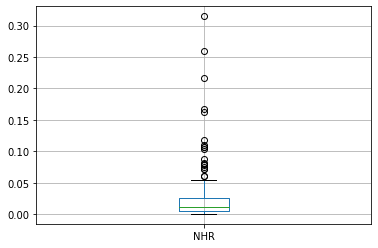

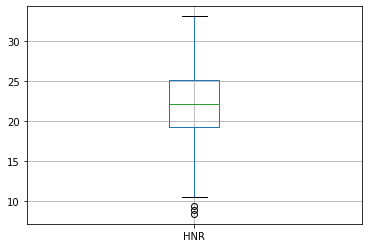

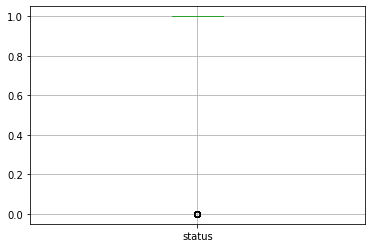

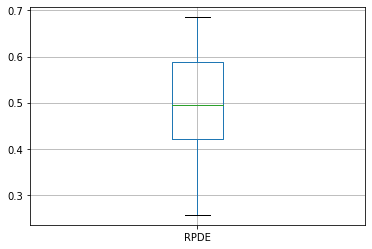

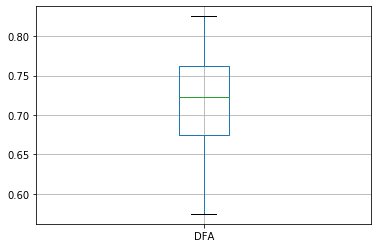

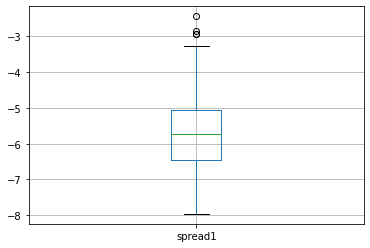

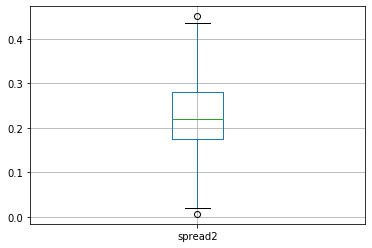

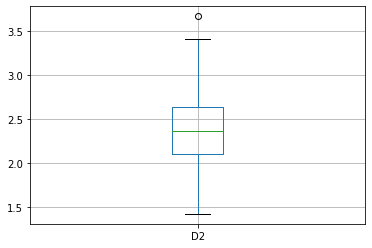

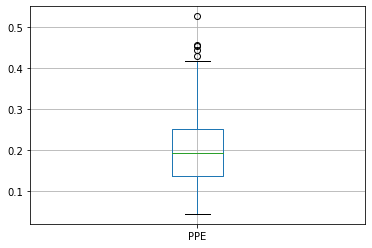

In [80]:
## Boxplot for all predictors
plt.rcParams.update({'figure.max_open_warning': 0})
for column in data:
    plt.figure()
    df.boxplot([column])

#### 5.3 Skewwed values 

In [13]:
for col in data.columns:
  #df = data[col]
  print("Skewwed value for {} is {}".format(col,data[col].skew()))

Skewwed value for Avg_vocal_freq is 0.5917374636540784
Skewwed value for Highest_vocal_freq is 2.542145997588398
Skewwed value for Lowest_vocal_freq is 1.217350448627808
Skewwed value for Jitter% is 3.0849462014441817
Skewwed value for Jitter_abs is 2.6490714165257274
Skewwed value for RAP is 3.360708450480554
Skewwed value for PPQ is 3.073892457888517
Skewwed value for DDP is 3.3620584478857203
Skewwed value for Shimmer is 1.6664804101559663
Skewwed value for Shimmer_dB is 1.999388639086127
Skewwed value for APQ3 is 1.5805763798815677
Skewwed value for APQ5 is 1.798697066537622
Skewwed value for APQ is 2.618046502215422
Skewwed value for DDA is 1.5806179936782263
Skewwed value for NHR is 4.22070912913906
Skewwed value for HNR is -0.5143174975652068
Skewwed value for status is -1.1877273855919208
Skewwed value for RPDE is -0.14340241379821705
Skewwed value for DFA is -0.03321366071383484
Skewwed value for spread1 is 0.4321389320131796
Skewwed value for spread2 is 0.14443048549278412
Sk

**Highest_vocal_freq, Lowest_vocal_freq, Jitter%, Jitter_abs, RAP, PPQ, DDP, Shimmer, Shimmer_dB,APQ3, APQ5, APQ, DDA, NHR are highly skewwed attributes to the right.**

#### 5.4 Correlation matrix

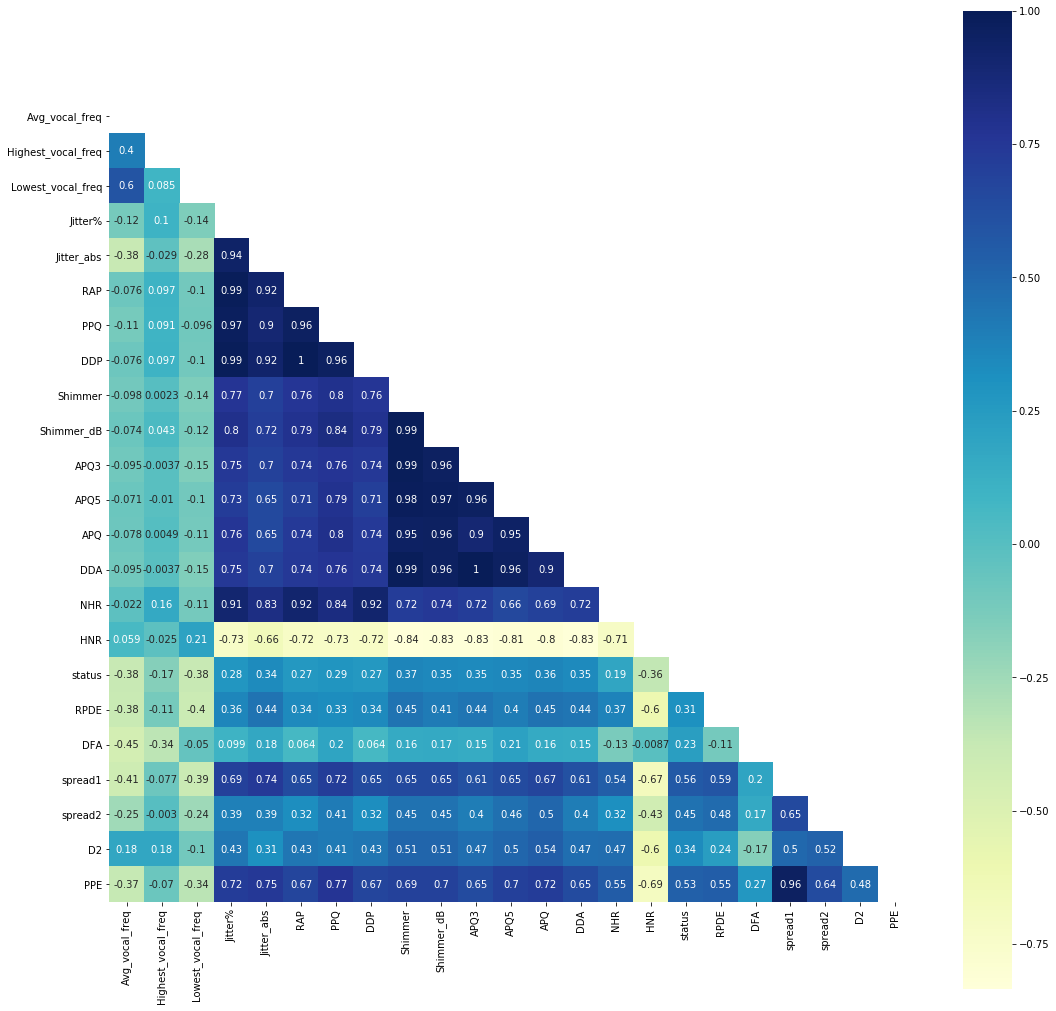

In [14]:
fig_dims = (18, 18)
fig, ax = plt.subplots(figsize=fig_dims)
corr=data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask,annot=True,square=True,ax=ax,cmap="YlGnBu")

#### 5.5 Top 20 highly correlated pairs

In [65]:
correlation_df=corrank(data)

In [69]:
print("Top 20 highly correlated pairs within the dataframe")
correlation_df.head(20)

Top 20 highly correlated pairs within the dataframe


,pairs,corr
177,"(APQ3, DDA)",1.000000
101,"(RAP, DDP)",1.000000
66,"(Jitter%, DDP)",0.990276
64,"(Jitter%, RAP)",0.990276
152,"(Shimmer, DDA)",0.987626
149,"(Shimmer, APQ3)",0.987625
148,"(Shimmer, Shimmer_dB)",0.987258
150,"(Shimmer, APQ5)",0.982835
65,"(Jitter%, PPQ)",0.974256
163,"(Shimmer_dB, APQ5)",0.973751


#### 5.6 Target variable distribution across different predictors

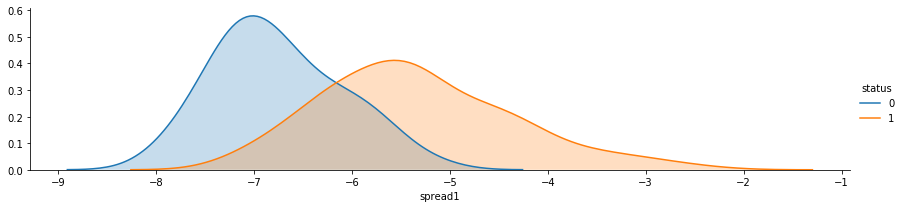

In [6]:
fig = sns.FacetGrid(data,hue='status',aspect=4)
fig.map(sns.kdeplot,'spread1',shade=True)
fig.add_legend()

In [ ]:
##'Avg_vocal_freq','Highest_vocal_freq','Lowest_vocal_freq','APQ','NHR','RPDE','DFA'

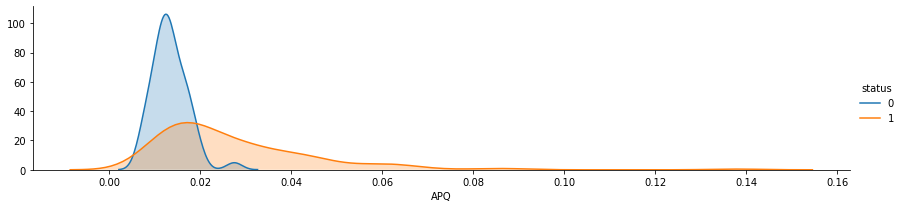

In [7]:
fig = sns.FacetGrid(data,hue='status',aspect=4)
fig.map(sns.kdeplot,'APQ',shade=True)
fig.add_legend()

In [25]:
cols=['Avg_vocal_freq','Highest_vocal_freq','Lowest_vocal_freq','APQ','NHR','RPDE','DFA']

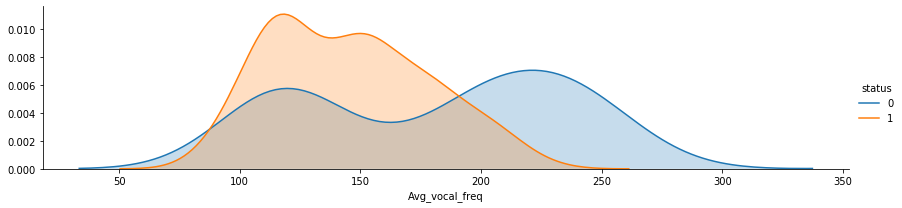

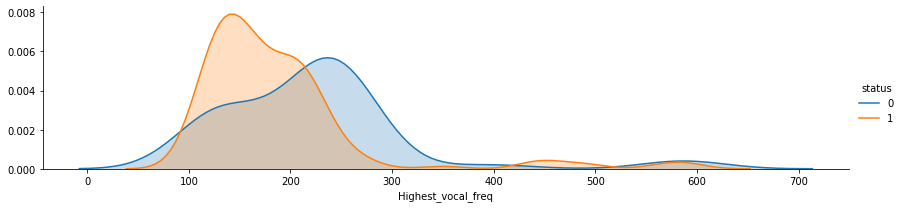

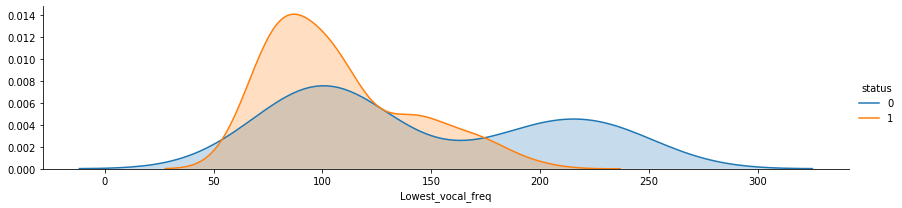

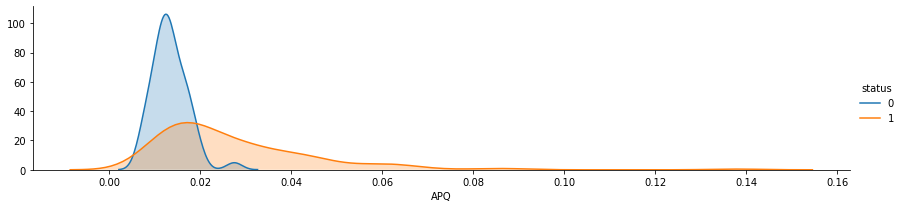

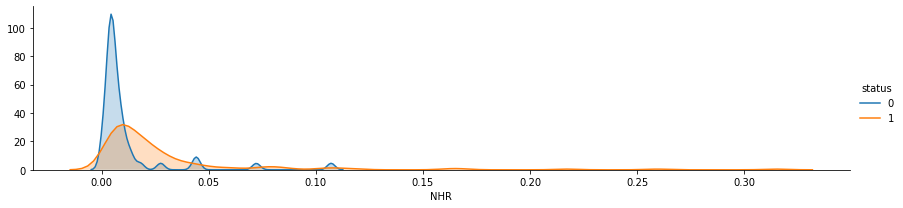

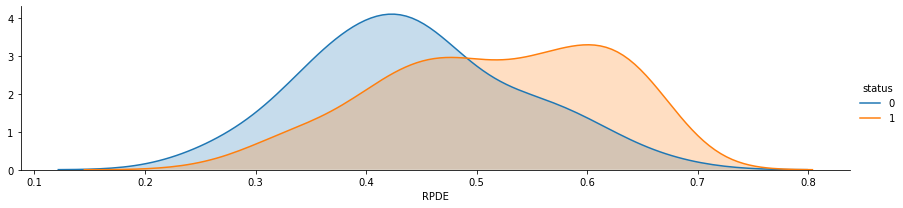

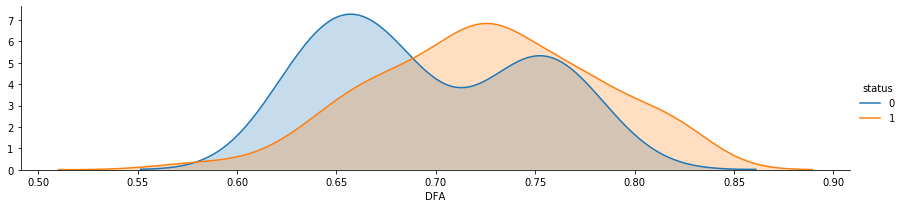

In [26]:
for col in cols:
    fig = sns.FacetGrid(data,hue='status',aspect=4)
    fig.map(sns.kdeplot,col,shade=True)
    fig.add_legend()

### **Observations on Independent variables**

1.   Many of the independent variables are having skewed distribution which is been indicated in the histogram plot in point 5.1 and since the dsitribution is skewed, the tail region will act as outlier which is the case with some variables. This can observed from the boxplots across independent variables in point 5.2
2.  Highest_vocal_freq, Lowest_vocal_freq, Jitter%, Jitter_abs, RAP, PPQ, DDP, Shimmer, Shimmer_dB,APQ3, APQ5, APQ, DDA, NHR are highly skewwed attributes to the right.   
3.   Since, many of the independent variables are being derived, correlation within them needs to be measured. In correlation plot from point 5.3, it is pretty much evident that there are some predictors which are correlated with more than one variable. 
4.   Point 5.5 represents the Top 20 highest correlated pairs within the data. APQ3, DDA and RAP, DDP are the two pairs showing the highest correlation .i.e 1 within each other. Shimmer and amplitude perturbation quotient are the two variables which are correlated with many variables among the top 20.

## 6. Data preparation

#### 6.1 Scalling the data

In [107]:
X=data.copy()

In [108]:
y=X.pop('status')

In [109]:
X.columns

Index(['Avg_vocal_freq', 'Highest_vocal_freq', 'Lowest_vocal_freq', 'Jitter%',
       'Jitter_abs', 'RAP', 'PPQ', 'DDP', 'Shimmer', 'Shimmer_dB', 'APQ3',
       'APQ5', 'APQ', 'DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2', 'PPE'],
      dtype='object')

**Since the attributes are measured at different scale, we will first scale the data using MINMAX scaler**

In [110]:
to_scaled_minmax=transform_minmaxscaler(X)

In [111]:
to_scaled_minmax.columns=['Avg_vocal_freq', 'Highest_vocal_freq', 'Lowest_vocal_freq', 'Jitter%',
       'Jitter_abs', 'RAP', 'PPQ', 'DDP', 'Shimmer', 'Shimmer_dB', 'APQ3',
       'APQ5', 'APQ', 'DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2', 'PPE']

#### 6.2 Calculating VIF

In [57]:
## Loop 1 running VIF
vif_cal(to_scaled_minmax)

Avg_vocal_freq  VIF =  21.09
Highest_vocal_freq  VIF =  3.27
Lowest_vocal_freq  VIF =  5.22
Jitter%  VIF =  361.18
Jitter_abs  VIF =  99.13
RAP  VIF =  2478064.31
PPQ  VIF =  199.19
DDP  VIF =  2479913.02
Shimmer  VIF =  1612.23
Shimmer_dB  VIF =  198.57
APQ3  VIF =  32699972.28
APQ5  VIF =  215.99
APQ  VIF =  123.71
DDA  VIF =  32688698.85
NHR  VIF =  15.45
HNR  VIF =  25.86
RPDE  VIF =  14.1
DFA  VIF =  18.41
spread1  VIF =  109.38
spread2  VIF =  21.84
D2  VIF =  20.91
PPE  VIF =  119.5


##### As mentioned earlier, since the variables are derived, we expected multicollinearity and it is the case here as indicated above

#### **Note-: Since due to lack of time at my end, I was not able to create a VIF function which will first calculate VIF for all variables first then will remove the variable with highest VIF and again calculate VIF and repeat the process again till all the variables are having VIF<10. I'm going to run the loop manually using a VIF_cal function I had created to calculate VIF and then will remove variable with highest VIF and will repeat the process till all the variables are having VIF<10**

In [86]:
## Loop 2 Revmoing APQ3 
## Loop 3 Removing DDP
## Loop 4 Removing Shimmer
## Loop 5 Removing Jitter%
## Loop 6 Removing Shimmer_dB
## Loop 7 Removing RAP
## Loop 8 Removing spread1
## Loop 9 Removing APQ5
## Loop 10 Removing PPQ
## Loop 11 Removing PPE
## Loop 12 Removing spread2
## Loop 13 Removing HNR
## Loop 14 Removing Jitter_abs
## Loop 15 Removing DDA
## Loop 16 Removing D2
vif_data=to_scaled_minmax[to_scaled_minmax.columns[~to_scaled_minmax.columns.isin(['APQ3',
                                                                                   'DDP',
                                                                                   'Shimmer',
                                                                                   'Jitter%',
                                                                                   'Shimmer_dB',
                                                                                   'RAP',
                                                                                   'spread1',
                                                                                   'APQ5',
                                                                                   'PPQ',
                                                                                   'PPE',
                                                                                   'spread2',
                                                                                   'HNR',
                                                                                   'Jitter_abs',
                                                                                   'DDA',
                                                                                   'D2'])]]
vif_cal(vif_data)

Avg_vocal_freq  VIF =  6.22
Highest_vocal_freq  VIF =  2.66
Lowest_vocal_freq  VIF =  4.26
APQ  VIF =  4.7
NHR  VIF =  3.01
RPDE  VIF =  5.15
DFA  VIF =  4.87


#### **All the above variables are having VIF less than 10, we are good to continue with this set of variables**

In [13]:
## Final dataframe independent variables after running VIF
df=to_scaled_minmax[['Avg_vocal_freq','Highest_vocal_freq','Lowest_vocal_freq','APQ','NHR','RPDE','DFA']]

#### 6.3 Splitting data into Train & Test and 1 & 0 distribution across main dataframe, Trainset and Testset

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [116]:
print("Original PD True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 1]), (len(data.loc[data['status'] == 1])/len(data.index)) * 100))
print("Original PD False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 0]), (len(data.loc[data['status'] == 0])/len(data.index)) * 100))
print("")
print("Training PD True Values    : {0} ({1:0.2f}%)".format(Y_train.value_counts()[1], (Y_train.value_counts()[1]/len(Y_train)) * 100))
print("Training PD False Values   : {0} ({1:0.2f}%)".format(Y_train.value_counts()[0], (Y_train.value_counts()[0]/len(Y_train)) * 100))
print("")
print("Test PD True Values        : {0} ({1:0.2f}%)".format(Y_test.value_counts()[1], (Y_test.value_counts()[1]/len(Y_test)) * 100))
print("Test PD False Values       : {0} ({1:0.2f}%)".format(Y_test.value_counts()[0], (Y_test.value_counts()[0]/len(Y_test)) * 100))
print("")


Original PD True Values    : 147 (75.38%)
Original PD False Values   : 48 (24.62%)

Training PD True Values    : 101 (74.26%)
Training PD False Values   : 35 (25.74%)

Test PD True Values        : 46 (77.97%)
Test PD False Values       : 13 (22.03%)



## 7. Training models

#### 7.1 Logistic regression using function

 Following results are for Logistic Regression 


Original PD True Values    : 147 (75.38%)
Original PD False Values   : 48 (24.62%)

Training PD True Values    : 107 (78.68%)
Training PD False Values   : 29 (21.32%)

Test PD True Values        : 40 (67.80%)
Test PD False Values       : 19 (32.20%)

The Model Score is 72.88
The Model Score on train set is 84.56
The Recall Score for the Model is 100.0
The Precision Score for the Model is 71.43
The F1 Score for the Model is 83.33




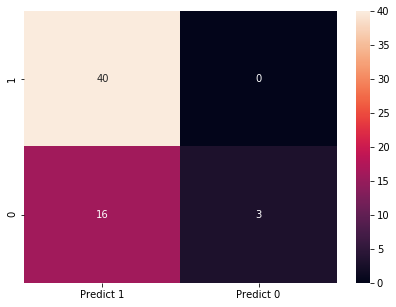

In [19]:
run_my_model_log(data,df,y)

Logistic Regression Model is marginally overfitting, since Model score on train set is 85% while on the test set it is 73%. Also due to target variable imbalance, we can see the Recall score is 100%. Mode

#### 7.2 KNN using function

In [117]:
run_my_model_knn(df,y,3)

 Following results are for KNN  


The Model Accuracy Score on train set is 1.0


Accuracy =  0.9830508474576272
Precision =  0.975609756097561
Recall =  1.0
F1 Score =  0.9876543209876543


Confusion Matrix


Actual      0   1
Predicted        
0          18   0
1           1  40


KNN model is fitting the trainset exceptionally well. Model score on train set is approx 1 and model score on testset is 98%. 

#### 7.3 Navie Bayes using function

In [143]:
run_my_model_nb(df,y)

 Following results are for Navie Bayes Classifier 


The Model Accuracy Score on train set is 0.75


Accuracy =  0.6271186440677966
Precision =  0.7647058823529411
Recall =  0.65
F1 Score =  0.7027027027027027


Confusion Matrix


Actual      0   1
Predicted        
0          11  14
1           8  26


#### 7.4 SVM using function

In [121]:
run_my_model_svm(df,y,'scale',1)

 Following results are for SVM Classifier 


The Model Accuracy Score on train set is 0.85


Accuracy =  0.7457627118644068
Precision =  0.7272727272727273
Recall =  1.0
F1 Score =  0.8421052631578948


Confusion Matrix


Actual      0   1
Predicted        
0           4   0
1          15  40


#### Hypertuning SVM parameters

In [124]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [0.1, 0.01, 0.001, 0.0001,1]}  

In [125]:
grid_search_SVM = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3)
grid_fit_SVM=grid_search_SVM.fit(X_train, Y_train)

In [126]:
best_clf_SVM=grid_fit_SVM.best_estimator_

In [127]:
best_clf_SVM

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
best_clf_SVM.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf_SVM.predict(X_train)
best_test_predictions = best_clf_SVM.predict(X_test)

#Model score on train set
model_score_train_svm=accuracy_score(Y_train,best_clf_SVM.predict(X_train))
print('The Model Accuracy Score on train set is {}'.format(round(model_score_train_svm,2)))

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

print("Accuracy = " , accuracy_score(Y_test, best_test_predictions))
print("Precision = " ,precision_score(Y_test, best_test_predictions))
print("Recall = " ,recall_score(Y_test, best_test_predictions))


conf_mat=pd.crosstab(best_test_predictions, Y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix')
print("\n")
print(conf_mat)

The Model Accuracy Score on train set is 0.99
The training F1 Score is 0.9950738916256158
The testing F1 Score is 0.967032967032967
Accuracy =  0.9491525423728814
Precision =  0.9777777777777777
Recall =  0.9565217391304348
Confusion Matrix


Actual      0   1
Predicted        
0          12   2
1           1  44


The final SVM model after hypertuning the parameters has accuracy on trainset as 99% and on testset as 95%. While the F-1 score is 97%

#### 7.5 Decision tree

In [132]:
## Decision tree object
clf = dt()

In [133]:
# Fit the model
clf.fit(X_train, Y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [134]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
generate_model_report(Y_test,test_predictions)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [136]:
generate_model_report(Y_train,train_predictions)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [137]:
conf_mat=pd.crosstab(test_predictions, Y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix')
print("\n")
print(conf_mat)

Confusion Matrix


Actual      0   1
Predicted        
0          13   0
1           0  46


## 8. Creating meta-classifier

In [163]:
estimators = [('dt', dt(random_state=1)),('knn',KNeighborsClassifier(n_neighbors=3)),
              ('svc',SVC(C=1.0, kernel='rbf', gamma='scale')) ]

In [164]:
meta_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [166]:
meta_clf.fit(X_train, Y_train)
model_score_train_metaclf=accuracy_score(Y_train,meta_clf.predict(X_train))
print('The Model Accuracy Score on train set is {}'.format(round(model_score_train_metaclf,2)))
print("\n")

y_predict=meta_clf.predict(X_test)
generate_model_report(Y_test,y_predict)
print("\n")
conf_mat=pd.crosstab(y_predict, Y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix')
print("\n")
print(conf_mat)


The Model Accuracy Score on train set is 1.0


Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


Confusion Matrix


Actual      0   1
Predicted        
0          13   0
1           0  46


## 9. Training Ensemble models

#### 9.1 Random Forest

In [138]:
rf=RandomForestClassifier(random_state=10)

In [139]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


In [140]:
# Number of trees in random forest
n_estimators = [50,100,150]
# Number of features to consider at every split
max_features = [1, 2, 3]
# Maximum number of levels in tree
max_depth = [1,2,3,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 7]
# Method of selecting samples for training each tree
bootstrap = [True]

In [141]:
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [143]:
# Instantiate the grid search model
scorer = make_scorer(f1_score)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid,scoring=scorer,
                          cv = 3, n_jobs = 4, verbose = 1)

In [144]:
# Fit the grid search to the data
grid_fit_rf=grid_search_rf.fit(X_train, Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 972 out of 972 | elapsed:  3.1min finished


In [ ]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, Y_train)
best_clf = grid_fit.best_estimator_

In [147]:
best_clf_rf=grid_fit_rf.best_estimator_

In [148]:
best_clf_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [149]:
scores = cross_val_score(best_clf_rf, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.9481285381285381

In [150]:
best_clf_rf.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf_rf.predict(X_train)
best_test_predictions = best_clf_rf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test)

conf_mat_dt=pd.crosstab(best_test_predictions, Y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix')
print("\n")
print(conf_mat_dt)

The training F1 Score is 1.0
The testing F1 Score is 1.0
Confusion Matrix


Actual      0   1
Predicted        
0          13   0
1           0  46


In [151]:
generate_model_report(Y_test,best_test_predictions)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [152]:
generate_model_report(Y_train,best_train_predictions)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


#### 9.2 Gradient Boosting

In [168]:
# Finding optimum value for the learning rate which controls overfiiting through a simple for loop
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Learning rate:  0.05
Accuracy score (training): 0.912
Accuracy score (validation): 0.932
Learning rate:  0.075
Accuracy score (training): 0.971
Accuracy score (validation): 0.983
Learning rate:  0.1
Accuracy score (training): 0.993
Accuracy score (validation): 0.983
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000


In [180]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, Y_train)

# Make predictions using the new model.
gb_train_predictions = gb_clf.predict(X_train)
gb_test_predictions = gb_clf.predict(X_test)


model_score_train=accuracy_score(Y_train,gb_train_predictions)
print('The Model Accuracy Score on train set is {}'.format(round(model_score_train,2)))
print("\n")

generate_model_report(Y_test,gb_test_predictions)


conf_matrix=pd.crosstab(gb_test_predictions, Y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix')
print("\n")
print(conf_matrix)

The Model Accuracy Score on train set is 1.0


Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
Confusion Matrix


Actual      0   1
Predicted        
0          13   0
1           0  46


## 10. Final results

In [187]:
acc=pd.DataFrame({'Technique':['Logistic','KNN','Navie Bayes','SVM','Decision Tree','Meta Classifier','Random Forest','Gradient Boosting'],
                  'Accuracy-Trainset':[0.85,1,0.75,0.99,1,1,1,1],
                 'Accuracy-Testset':[0.72,0.98,0.63,0.95,1,1,1,1],
                 'F1-Score Testset':[0.83,0.99,0.70,0.97,1,1,1,1],
                  'Recall-Score Testset':[1,1,0.65,0.96,1,1,1,1]})

In [188]:
acc

,Technique,Accuracy-Trainset,Accuracy-Testset,F1-Score Testset,Recall-Score Testset
0,Logistic,0.85,0.72,0.83,1.00
1,KNN,1.00,0.98,0.99,1.00
2,Navie Bayes,0.75,0.63,0.70,0.65
3,SVM,0.99,0.95,0.97,0.96
4,Decision Tree,1.00,1.00,1.00,1.00
5,Meta Classifier,1.00,1.00,1.00,1.00
6,Random Forest,1.00,1.00,1.00,1.00
7,Gradient Boosting,1.00,1.00,1.00,1.00


### From the above table, it is fairly obvious that the tree based models .i.e Decision tree, Random forest,Gradient boosting have performed well on the Parkinsons problem statement. Considering the following problem statement, I would term Gradient boosting as the best models among all, reason being the amount of time it took to trained the GB model and we had to tune only one parameter to get the required accuracy.

## Gradient Boosting Algorithm Wins!!